In [12]:
import pandas as pd

invoices_df = pd.read_csv("fct_invoice.csv")
customers_df = pd.read_json("dim_customer.json")

invoices_df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [13]:
unique_customers = customers_df['id'].nunique()
unique_customers

5191

In [8]:
unique_categories = invoices_df['category'].unique()
num_categories = len(unique_categories)
(unique_categories, num_categories)

(array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
        'Toys', 'Technology', 'Souvenir'], dtype=object),
 8)

In [14]:
payment_counts = invoices_df['payment_method'].value_counts()
most_popular = payment_counts.idxmax()
count = payment_counts.max()
(most_popular, count)

('Cash', 44447)

In [23]:
invoices_df['total_sales'] = invoices_df['quantity'] * invoices_df['price']
top_categories = invoices_df.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)
top_categories

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

In [24]:
merged_df = invoices_df.merge(customers_df, left_on='customer_id', right_on='id', how='left')
sales_over_45 = merged_df[merged_df['age'] > 45]['total_sales'].sum()
print(sales_over_45)

82039768.15


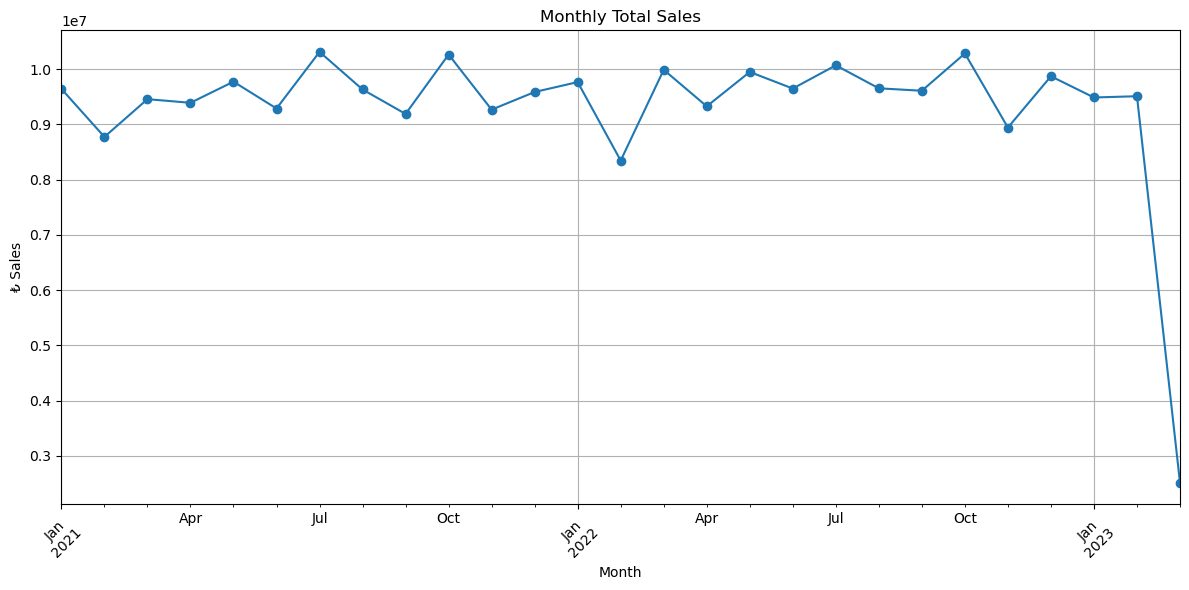

In [25]:
import matplotlib.pyplot as plt

merged_df['invoice_date'] = pd.to_datetime(merged_df['invoice_date'], dayfirst=True, errors='coerce')

monthly_sales = merged_df.groupby(merged_df['invoice_date'].dt.to_period('M'))['total_sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('₺ Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
def age_group(age):
    if pd.isna(age):
        return 'Unknown'
    decade = int(age // 10) * 10
    return f'{decade}-{decade + 9}'

merged_df['age_group'] = merged_df['age'].apply(age_group)

pivot_table = pd.pivot_table(
    merged_df,
    values='total_sales',
    index='category',
    columns='age_group',
    aggfunc='sum',
    fill_value=0
)

pivot_table

age_group,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,Unknown
category,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,334012.05
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,46003764.40
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,2777362.62
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,345875.59
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,26468097.17
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,265661.04
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,23865450.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,1587210.24
